# Machine Learning 2022
## Lab. 11- Neural Networks
### Imię i nazwisko: Kacper Moździerz
### Nr albumu: 401733
### Data: 31.05.2022

### Grupa: wtorek 9:30 - 11:00
______________________________________________

# An introduction to Artificial Neural Networks
Maciej Aleksandrowicz, MVG Group 2022, Machine Learning Laboratory, Version 2

## Glossary
| Acronym/Short name | Full name |
| --- | --- |
| ANN | Artificial Neural Network |
| Backprog | Backward propagation |


## Part 1: Universal Aproximators
Artifical Neural Networks (ANN) can be seen as a functions aproximators, optimized on provided data. 

### Artificial Neuron Model

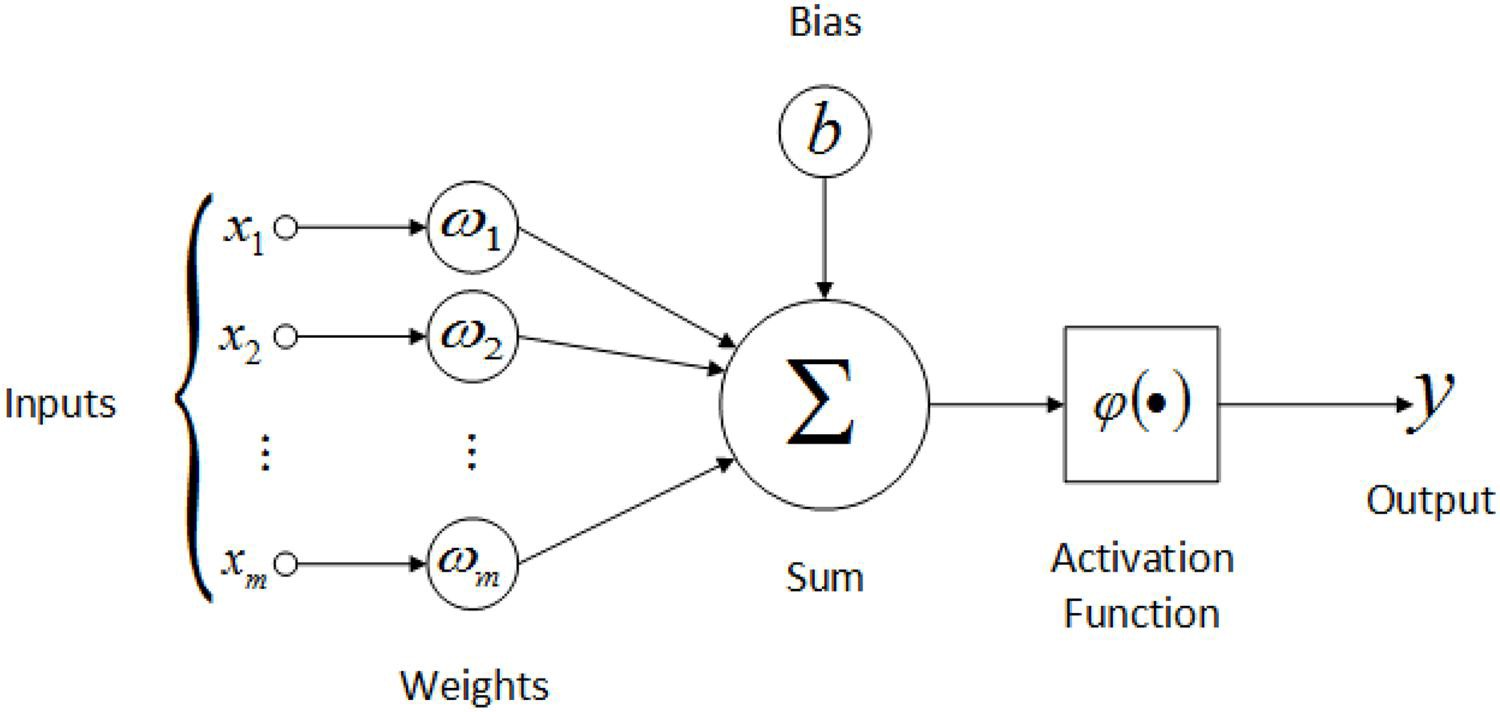

### Matrix representation

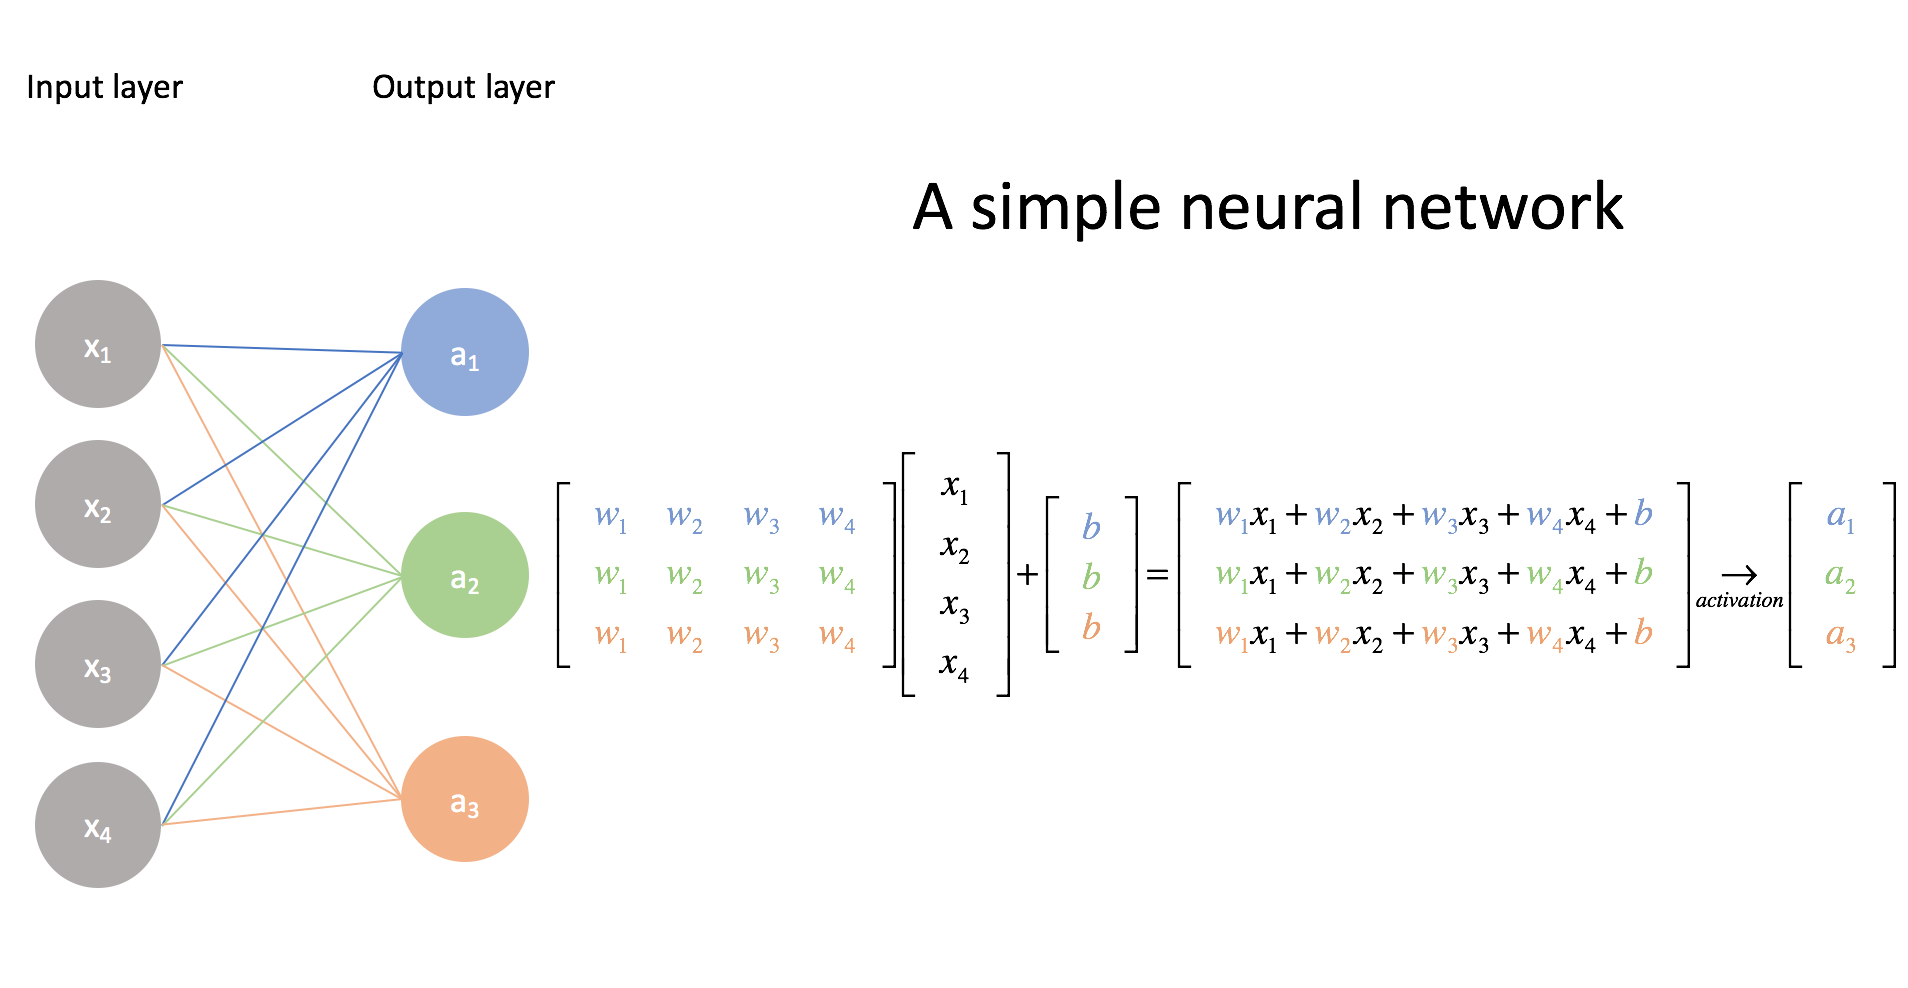

### Example activation functions

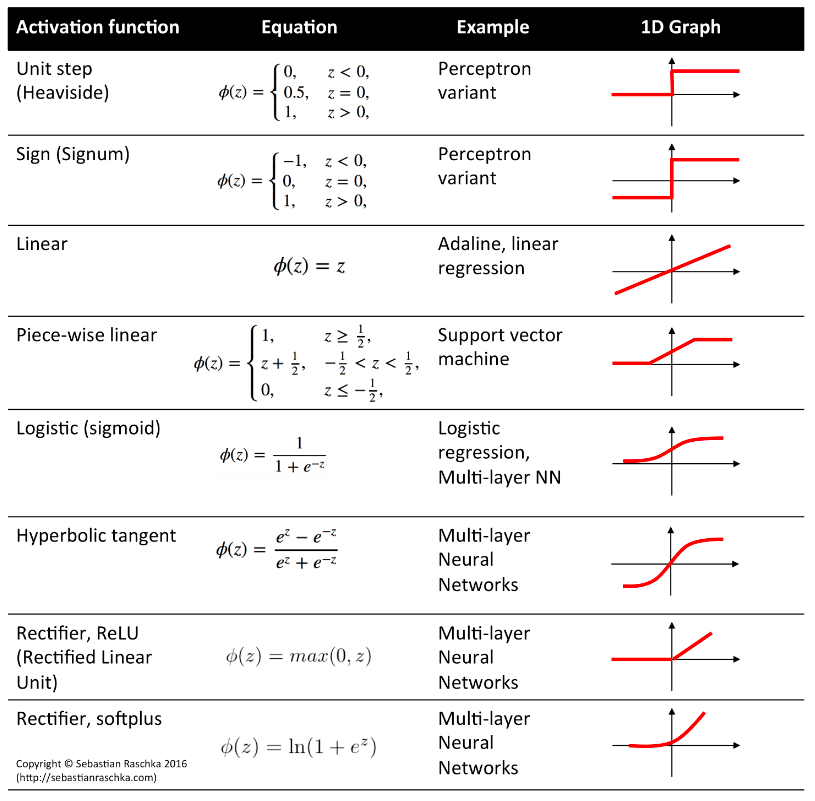

### Forward propagation example

In [53]:

import numpy as np
def ReLU(x):
    return np.maximum(0, x)

# Layer size
input_size = 2
neuron_units = 10

# Initialization
x = np.random.randn(input_size, 1)
weights = np.random.randn(neuron_units, input_size)
biases = np.random.randn(neuron_units, 1)

# Forward propagation
activation = np.dot(weights, x) + biases
y = ReLU(activation)

print(y)


[[2.43084621]
 [0.31691503]
 [2.66349614]
 [1.52245987]
 [0.        ]
 [2.65383931]
 [0.        ]
 [4.68181867]
 [1.00373541]
 [0.        ]]


### Backward propagation
Also know as "Backpropagation" or shortly "Backprog", is a method of optimizing (training) ANN's weights and biases.

#### Single neuron backpropagation 
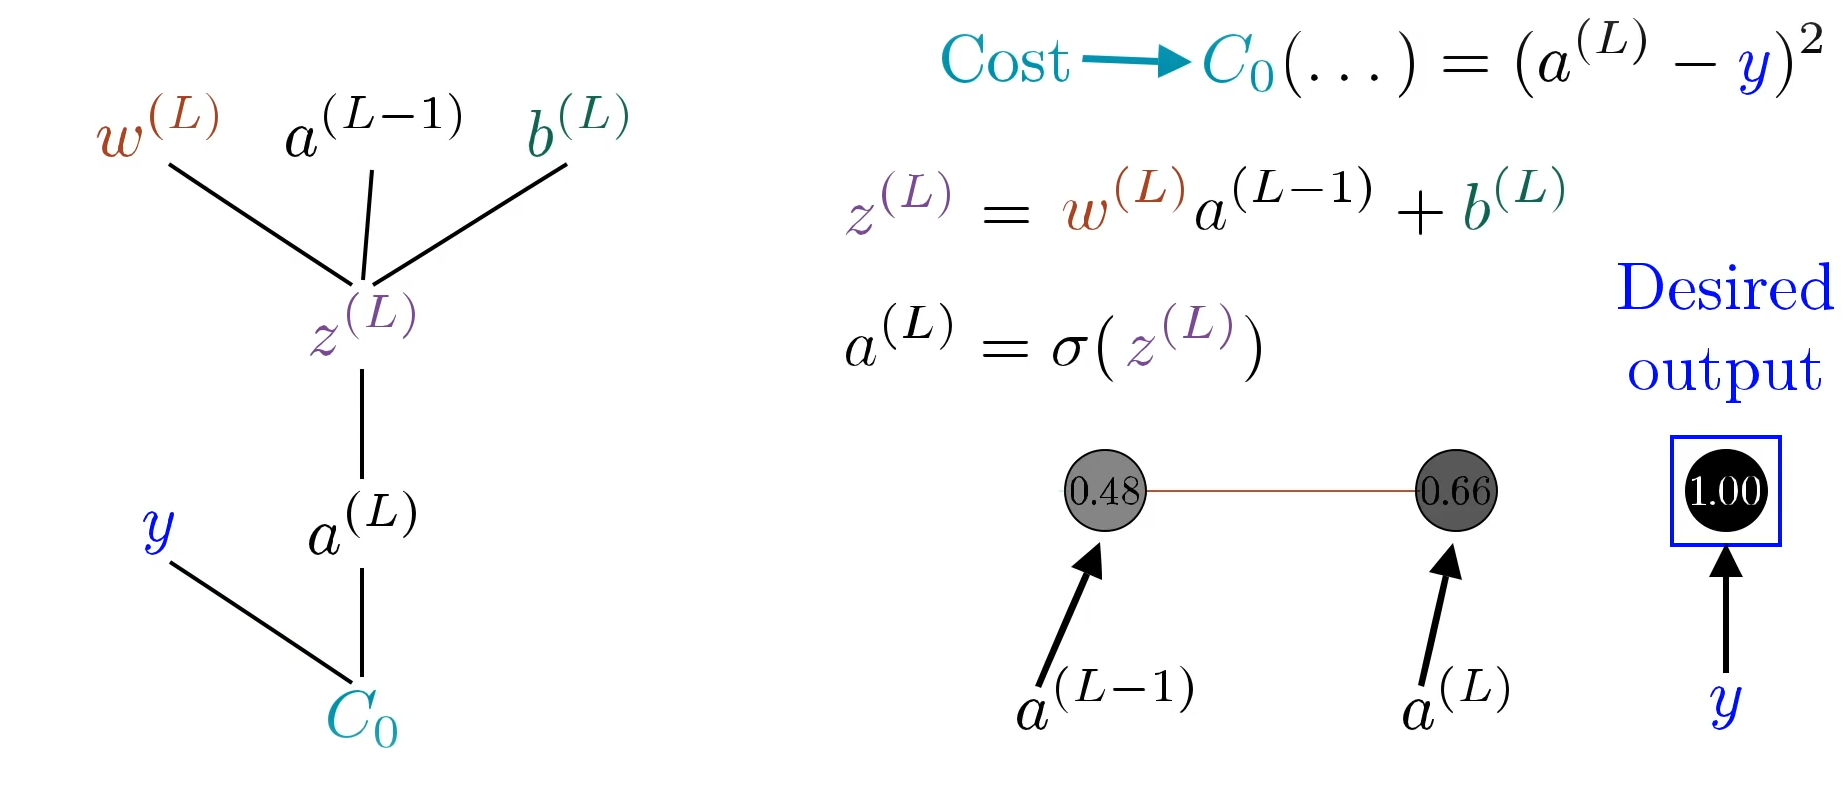

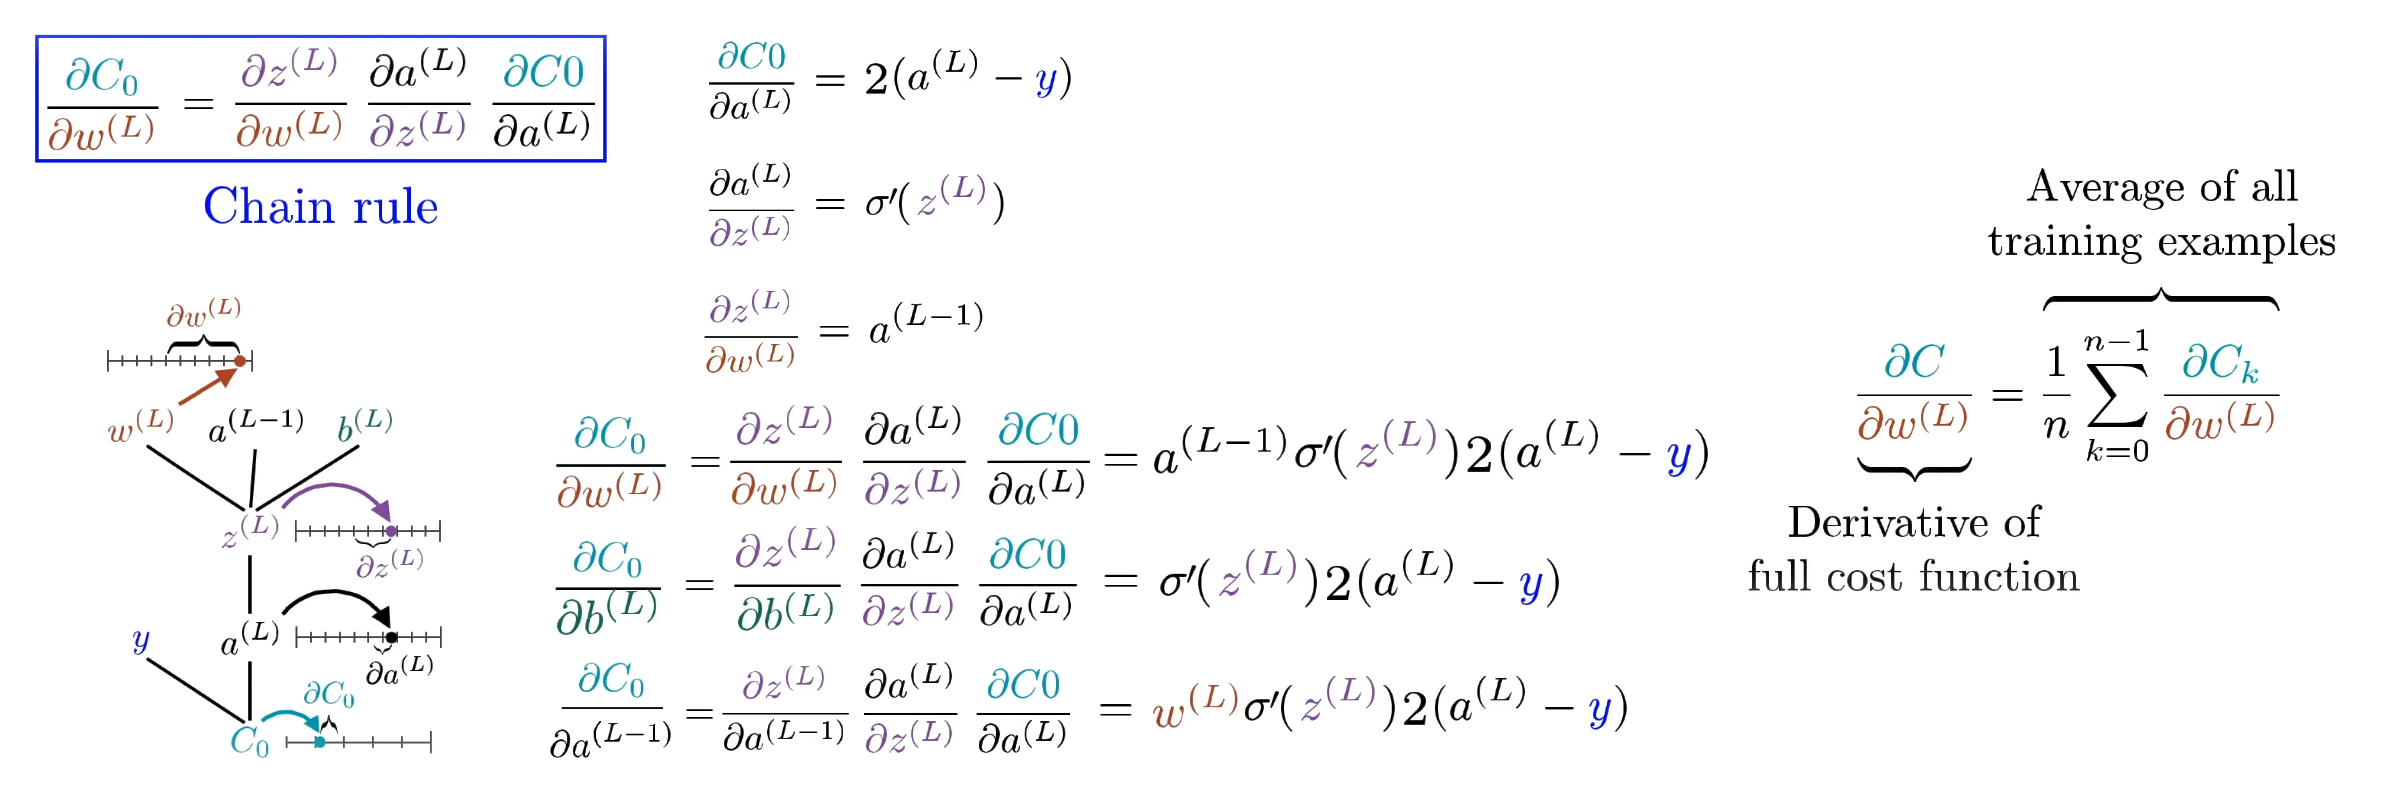

#### Multiple neurons backpropg
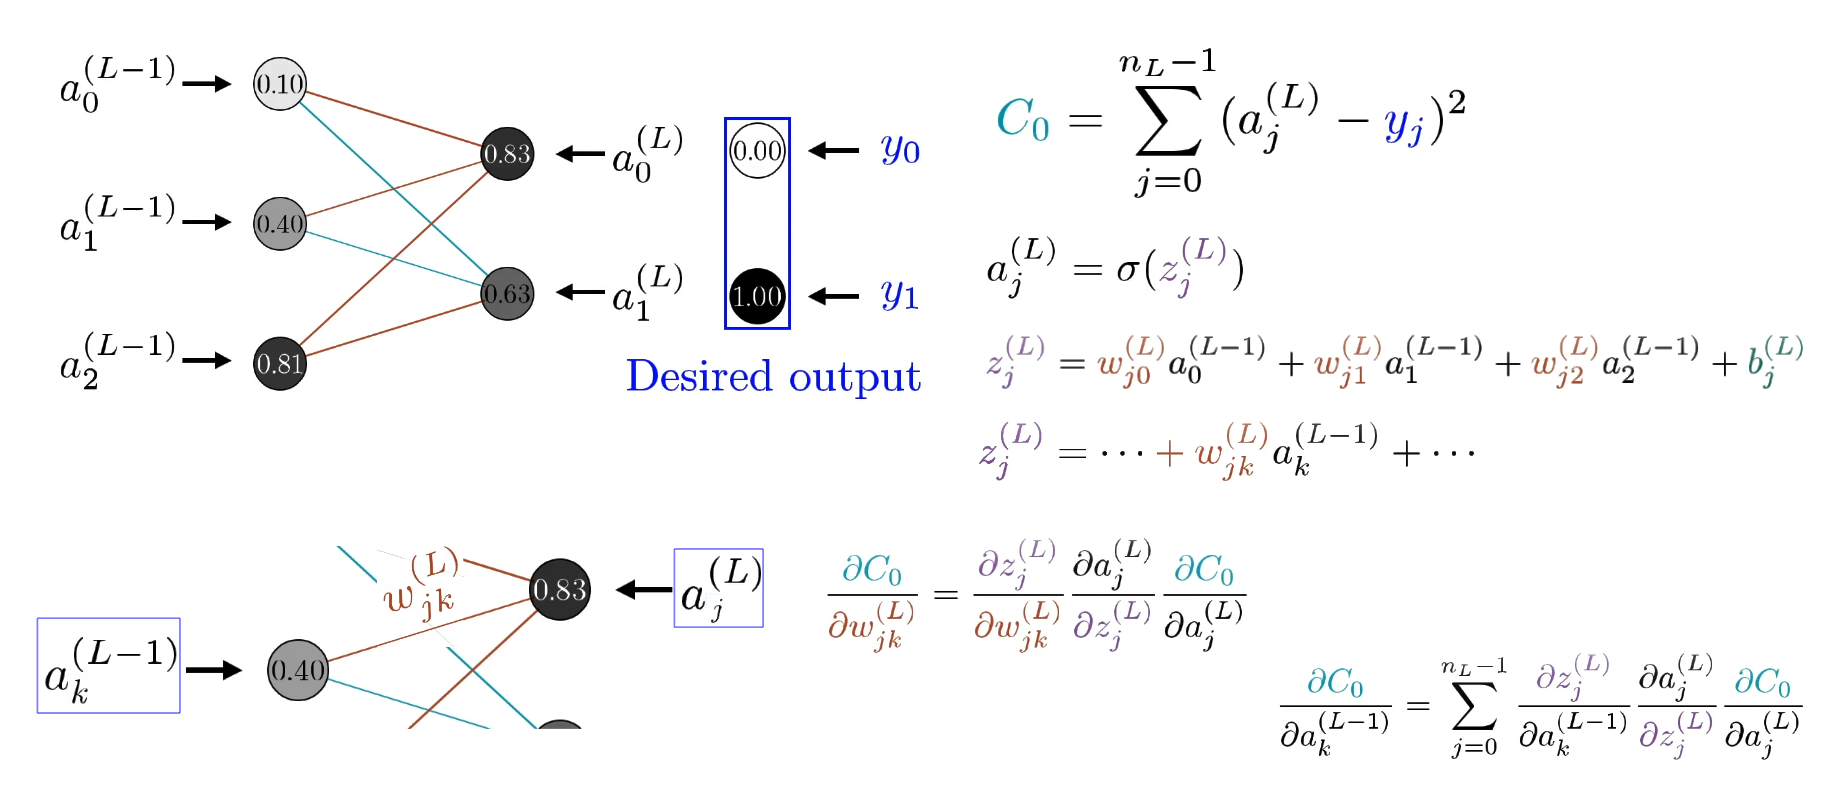

### Basic forward & backward implementation example

In [54]:
def init_params():
    W1 = np.random.rand(10, input_size) - 0.5
    b1 = np.random.rand(10, 1)- 0.5
    W2 = np.random.rand(10,10)- 0.5
    b2 = np.random.rand(10, 1)- 0.5
    return W1, b1, W2, b2

def ReLU(Z):
    return np.maximum(0, Z)

def ReLU_deriv(Z):
    return Z > 0

def softmax(Z):
    return np.exp(Z) / sum(np.exp(Z))

def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    m = Y.size
    dZ2 = A2 - Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1    
    W2 = W2 - alpha * dW2  
    b2 = b2 - alpha * db2    
    return W1, b1, W2, b2

def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
    return W1, b1, W2, b2

## Part 2: Basic implementation
In the following sections we will depend mainly on Numpy package

In [55]:
%pip install numpy
import numpy as np

Note: you may need to restart the kernel to use updated packages.


### Task 2.1
Implement an artificial neuron class, with **sigmoid** activation function. Use matrix operations (from Numpy package). Rememebr to define the activation function derivative. You can use following class-template or implement whole class by yourself.

In [56]:
from typing import Callable,Tuple

def activation_function(x: float) -> float:
    return 1/(1+np.exp(-x))

def activation_function_deriv(x: float) -> float:
    sgn = activation_function(x)
    return sgn * (1-sgn)


class Neuron:
    def __init__(self, input_size: int, act_func: Callable, act_func_deriv: Callable):
        self._init_weights_and_bias(input_size)
        self._activation_function = act_func
        self._activation_function_deriv = act_func_deriv

        
    def _init_weights_and_bias(self, input_size: int):
        self.weights = np.random.rand(input_size)
        self.bias = np.random.rand()
    
    def __call__(self, x: np.array) -> float:
        return self._forward_propagation(x)
    
    def _forward_propagation(self, x: np.array) -> float:
        return self._activation_function(self.weights @ x.T + self.bias)
    
    def gradient_descent(self, x: np.array, y_target: np.array, alpha: float, iterations: int) -> None:
        self.alpha = alpha 
        for iter in range(iterations):
            self.d_weight, self.d_bias = self._backward_propagation(x, self._forward_propagation(x) - y_target)
            self._update_weights_and_bias()

    
    def _backward_propagation(self, x: np.array, err: np.array) -> Tuple[np.array, np.array]:
        diff = self._activation_function_deriv(self.weights @ x.T + self.bias) * err
        return np.dot(x.T, diff), np.sum(diff)
    
    def _update_weights_and_bias(self):
        self.weights -= self.alpha*self.d_weight
        self.bias    -= self.alpha*self.d_bias


## Part 3: Artificial Neuron as binary clasifier
A single neuron used as binary classifier is also known as *perceptron*, frequently used as building block for *dense* layer. It can be used for logistic regression.

### Task 3.1
1) Using your Neuron class construct a following ANN:
  * Input size: 2
  * 1 layer with 1 unit with any activation function
  * Output size: 1

2) Perform separate trainings on provided datasets of truth tables of logic gates. You can experiment with number of iterations (start with n=500) and learnining rate (start with alpha = 0.1)

3) Visualize each dataset and ANN's result (a regression line, as function of two inputs).

4) Comment results

#### OR gate

In [57]:
dataset_or_x = np.array(((0,0), (0,1), (1,0), (1,1)))
dataset_or_y = np.array((0, 1, 1, 1))

neuron_or_gate = Neuron(2, activation_function,activation_function_deriv)
neuron_or_gate.gradient_descent(dataset_or_x, dataset_or_y, .05, 10000)

In [58]:
def visualize_result(neuron,vec_size=500):
    import matplotlib.pyplot as plt
    vec = np.linspace(0,1,vec_size)
    x,y=np.meshgrid(vec, vec)
    point_grid = np.concatenate([x.reshape(-1,1),y.reshape(-1,1)],axis=1)
    result = neuron(point_grid) >= 0.5
    plt.figure(figsize=(7, 7))
    plt.scatter(point_grid[:, 0][result], point_grid[:, 1][result], color="red")
    plt.scatter(point_grid[:, 0][~result],point_grid[:, 1][~result], color="g")
    plt.legend(["1 (y >= 0.5)", "0 (y < 0.5)"], loc='upper right')
    plt.show()





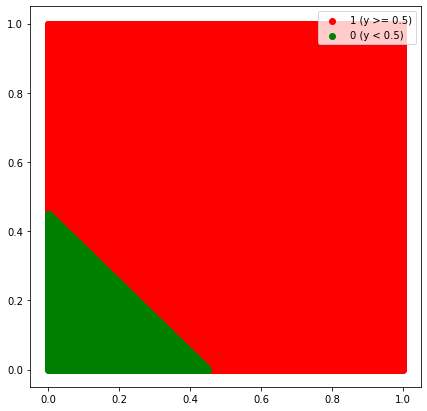

array([0.08108846, 0.94968849, 0.94969241, 0.99975242])

In [59]:
visualize_result(neuron_or_gate)
neuron_or_gate(dataset_or_x)

#### AND gate

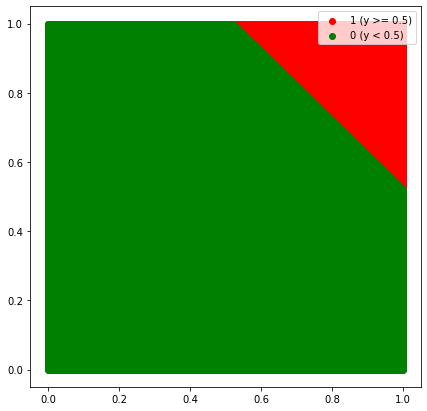

array([8.55041753e-04, 8.17030851e-02, 8.17031309e-02, 9.02441127e-01])

In [60]:
dataset_and_x = np.array(((0,0), (0,1), (1,0), (1,1)))
dataset_and_y = np.array((0, 0, 0, 1))

neuron_and_gate = Neuron(2, activation_function,activation_function_deriv)
neuron_and_gate.gradient_descent(dataset_and_x, dataset_and_y, .05, 10000)

visualize_result(neuron_and_gate)
neuron_and_gate(dataset_and_x)

#### XOR gate

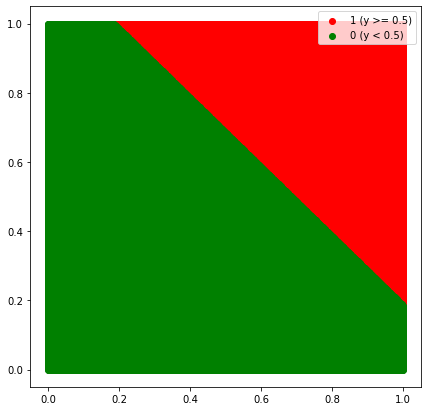

array([0.5, 0.5, 0.5, 0.5])

In [61]:
dataset_xor_x = np.array(((0,0), (0,1), (1,0), (1,1)))
dataset_xor_y = np.array((0, 1, 1, 0))

neuron_xor_gate = Neuron(2, activation_function,activation_function_deriv)
neuron_xor_gate.gradient_descent(dataset_xor_x, dataset_xor_y, .05, 10000)

visualize_result(neuron_xor_gate)
neuron_xor_gate(dataset_xor_x)

## Part 4: Multilayer perceptron
More neurons can be stacked together to model nonlinear properties.  

### Task 4.1
In this task you have to implement following ANN:
* Input size: 2
* 1 layer with 2 units with sigmoid activation function
* 1 layer with 1 unit with sigmoid activation function
* Output size: 1
    
Your Neuron class was not designed for ambitious merging of weights and biases during the gradient descent, nor for passing outputs to perform forward propagation. To overcome such inconvenience, please manualy define dataflow and method calling for all Neurons. You can expand provided example.

In [62]:
class NeuralNetwork():
    def __init__(self, input_size: int, act_func: Callable, act_func_deriv: Callable):
        self._neuron_1 = Neuron(input_size, act_func, act_func_deriv)
        self._neuron_2 = Neuron(input_size, act_func, act_func_deriv)
        self._neuron_3 = Neuron(input_size, act_func, act_func_deriv)
        
    def __call__(self, x: np.array) -> float:
        return self._network_forward_propagation(x)

    def _network_forward_propagation(self, x: np.array) -> float:
        input_3_1 = self._neuron_1(x)
        input_3_2 = self._neuron_2(x)
        input_3 = np.array([input_3_1, input_3_2]).T
        return self._neuron_3(input_3)

    def _network_backwards_propagation(self, x: np.array, y: np.array, alpha) -> None:
        input_3_1 = self._neuron_1(x)
        input_3_2 = self._neuron_2(x)
        input_3 = np.array([input_3_1, input_3_2]).T

        err = self._network_forward_propagation(x) - y
        err1 = err * self._neuron_1._activation_function_deriv(self._neuron_1(x)) * self._neuron_3.weights[0]
        err2 = err * self._neuron_2._activation_function_deriv(self._neuron_2(x)) * self._neuron_3.weights[1]

        d_weights1, d_bias1 = self._neuron_1._backward_propagation(x, err1)
        d_weights2, d_bias2 = self._neuron_2._backward_propagation(x, err2)
        d_weights3, d_bias3 = self._neuron_3._backward_propagation(input_3, err)


        self._neuron_1.weights -= alpha * d_weights1
        self._neuron_2.weights -= alpha * d_weights2
        self._neuron_3.weights -= alpha * d_weights3

        self._neuron_1.bias -= alpha * d_bias1
        self._neuron_2.bias -= alpha * d_bias2
        self._neuron_3.bias -= alpha * d_bias3

    def gradient_descent(self, x: np.array, y: np.array, alpha, iterations) -> None:
        for _ in range(iterations):
            self._network_backwards_propagation(x, y, alpha)

### Task 4.2
1) Train your ANN created in task 4.1 on the XOR dataset. You can experiment with number of iterations (start with n=500) and learning rate (start with alpha=0.1).

2) Visualize the dataset and ANN's result (a regression line, as function of two inputs).

3) Comment results.

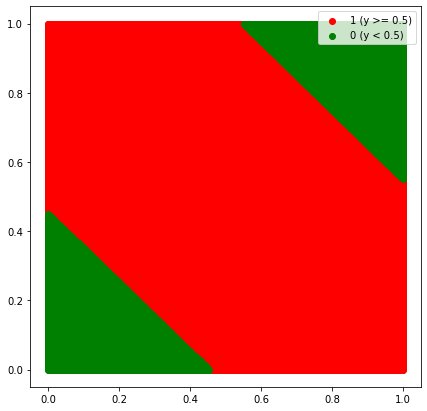

array([0.03430613, 0.97326188, 0.97316192, 0.02586449])

In [63]:
dataset_xor_x = ((0,0), (0,1), (1,0), (1,1))
dataset_xor_y = (0, 1, 1, 0)

neural_network = NeuralNetwork(2, activation_function, activation_function_deriv)
neural_network.gradient_descent(np.array(dataset_xor_x), np.array(dataset_xor_y), 0.3, 6000)
visualize_result(neural_network)


neural_network(np.array(dataset_xor_x))

## Remarks
* **Do not implement ANN by yourself** - use already tested open-source frameworks with hardware acceleration, such as PyTorch, Keras, TensorFlow, Jax+Haiku, etc.
* **Every ANN is just an aproximator for a certain (often unknown) function** - Nothing more, nothing less. The learning procedure is data-based brutal force function derivation.
* **Despite current knowledge, selecting ANN dimensions is still more art than science** - every fixed parameter can be considered as "hyperparameter", which can be further optimized by an adequate algorithm.
* **Selecting an activation function is not trival** - always consider dimishing gradient and caluclation cost

## Further reading
* https://www.youtube.com/watch?v=tIeHLnjs5U8
* https://brilliant.org/wiki/perceptron/
* https://towardsdatascience.com/how-does-back-propagation-in-artificial-neural-networks-work-c7cad873ea7
* https://www.edureka.co/blog/backpropagation/